# Data Assessment & Analytics
- Water Rights Data

In [1]:
# Needed Libararies

# working with data
import os
import numpy as np
import pandas as pd
import geopandas as gpd

# visulizaiton
import matplotlib.pyplot as plt
import seaborn as sns

# Cleanup
from datetime import datetime
pd.set_option('display.max_columns', 999)  # How to display all columns of a Pandas DataFrame in Jupyter Notebook

In [2]:
#Setting work directory
workingDir = "G:/Shared drives/WaDE Data/Wyoming/WaterAllocation"
os.chdir(workingDir)
print("Current working directory: {0}".format(workingDir))

Current working directory: G:/Shared drives/WaDE Data/Wyoming/WaterAllocation


In [3]:
# read in source files, add UUID (similar to preproessing)
# read in missing files, if exist
# left full join missing -to- DataAssessment via UUID field.
# separate non-joined records (used) into one dataframe, and joined (not-used) into another
# export both dataframes into one xlsx file, with "used" records on one tab, and "not used" on another.

## Input source files
- specific to state and available input files.

In [4]:
dfwyg = pd.read_csv("RawInputData/POD_GW_DepthI_FC_input.csv")
print(len(dfwyg))

dfwys = pd.read_csv("RawInputData/POD_SW_DepthI_FC_input.csv")
print(len(dfwys))

dfpou = pd.read_csv("RawInputData/POU_input.csv")
print(len(dfpou))

2323
9659


C:\Users\rjame\AppData\Local\Temp\ipykernel_13696\2304653199.py:7: DtypeWarning: Columns (39,45,46,52) have mixed types. Specify dtype option on import or set low_memory=False.
  dfpou = pd.read_csv("RawInputData/POU_input.csv")


491676


## watersources.csv review

In [17]:
# watersources.csv
inputfile = "ProcessedInputData/watersources.csv"
df_ws = pd.read_csv(inputfile)
print(len(df_ws))
df_ws.head(1)

2596


,WaterSourceUUID,Geometry,GNISFeatureNameCV,WaterQualityIndicatorCV,WaterSourceName,WaterSourceNativeID,WaterSourceTypeCV
0,WYwr_WS1,NaN,NaN,Fresh,Unspecified,WaDEWY_WS1,Groundwater


In [6]:
df_ws.info()
df_ws.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2596 entries, 0 to 2595
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   WaterSourceUUID          2596 non-null   object 
 1   Geometry                 0 non-null      float64
 2   GNISFeatureNameCV        0 non-null      float64
 3   WaterQualityIndicatorCV  2596 non-null   object 
 4   WaterSourceName          2595 non-null   object 
 5   WaterSourceNativeID      2596 non-null   object 
 6   WaterSourceTypeCV        2596 non-null   object 
dtypes: float64(2), object(5)
memory usage: 142.1+ KB


,WaterSourceUUID,Geometry,GNISFeatureNameCV,WaterQualityIndicatorCV,WaterSourceName,WaterSourceNativeID,WaterSourceTypeCV
count,2596,0.0,0.0,2596,2595,2596,2596
unique,2596,NaN,NaN,1,2592,2596,3
top,WYwr_WS1,NaN,NaN,Fresh,Unspecified,WaDEWY_WS1,Surface Water
freq,1,NaN,NaN,2596,2,1,2589
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# watersources_missing.xlsx
if (os.path.exists('ProcessedInputData/watersources_missing.xlsx') == True):
    print("File exists.")
    print("Merging missing and input files based on WaDEUUID...")
    
    inputfile = "ProcessedInputData/watersources_missing.xlsx"
    df_ws_ms = pd.read_excel(inputfile)

    # Explode file by data assessment WaDEUUID
    df_ws_ms = df_ws_ms.assign(WaDEUUID=df_ws_ms['WaDEUUID'].str.split(',')).explode('WaDEUUID').reset_index(drop=True)

    # Create dataframes by input file
    df_ws_mss_gw = pd.merge(df_ws_ms, dfwyg, on='WaDEUUID', how='inner')
    df_ws_ms_sw = pd.merge(df_ws_ms, dfwys, on='WaDEUUID', how='inner')
    df_ws_ms_pou = pd.merge(df_ws_ms, dfpou, on='WaDEUUID', how='inner')

    # Create a Pandas Excel writer using 'xlsxwriter' as the engine.
    writer = pd.ExcelWriter('DataAssessment/watersources_Incomplete.xlsx', engine='xlsxwriter')

    # Write each input dataframe to a different worksheet.
    print("Writing to xlsx file...")
    df_ws_ms_gw.to_excel(writer, sheet_name='GW')
    df_ws_ms_sw.to_excel(writer, sheet_name='SW')
    df_ws_ms_pou.to_excel(writer, sheet_name='POU')

    # Close the Pandas Excel writer and output the Excel file.
    writer.save()
    print("Done.")

else:
    print("No watersources_missing.xlsx file.")

No watersources_missing.xlsx file.


## sites.csv review

In [8]:
# sites.csv
inputfile = "ProcessedInputData/sites.csv"
df_s = pd.read_csv(inputfile)
print(len(df_s))
df_s.head(1)

74953


,SiteUUID,RegulatoryOverlayUUIDs,WaterSourceUUIDs,CoordinateAccuracy,CoordinateMethodCV,County,EPSGCodeCV,Geometry,GNISCodeCV,HUC12,HUC8,Latitude,Longitude,NHDNetworkStatusCV,NHDProductCV,PODorPOUSite,SiteName,SiteNativeID,SitePoint,SiteTypeCV,StateCV,USGSSiteID
0,WYwr_S1,NaN,WYwr_WS1,Unspecified,Unspecified,NaN,4326,NaN,NaN,NaN,NaN,42.9129,-104.46127,NaN,NaN,POD,O W WELL #1,WaDEWY_S1,NaN,Well,WY,NaN


In [9]:
df_s.info()
df_s.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74953 entries, 0 to 74952
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SiteUUID                74953 non-null  object 
 1   RegulatoryOverlayUUIDs  0 non-null      float64
 2   WaterSourceUUIDs        74953 non-null  object 
 3   CoordinateAccuracy      74953 non-null  object 
 4   CoordinateMethodCV      74953 non-null  object 
 5   County                  0 non-null      float64
 6   EPSGCodeCV              74953 non-null  int64  
 7   Geometry                0 non-null      float64
 8   GNISCodeCV              0 non-null      float64
 9   HUC12                   0 non-null      float64
 10  HUC8                    0 non-null      float64
 11  Latitude                74953 non-null  float64
 12  Longitude               74953 non-null  float64
 13  NHDNetworkStatusCV      0 non-null      float64
 14  NHDProductCV            0 non-null    

,SiteUUID,RegulatoryOverlayUUIDs,WaterSourceUUIDs,CoordinateAccuracy,CoordinateMethodCV,County,EPSGCodeCV,Geometry,GNISCodeCV,HUC12,HUC8,Latitude,Longitude,NHDNetworkStatusCV,NHDProductCV,PODorPOUSite,SiteName,SiteNativeID,SitePoint,SiteTypeCV,StateCV,USGSSiteID
count,74953,0.0,74953,74953,74953,0.0,74953.0,0.0,0.0,0.0,0.0,74953.000000,74953.000000,0.0,0.0,74953,74953,74953,0.0,74953,74953,0.0
unique,74953,NaN,2603,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,59402,71165,NaN,4,1,NaN
top,WYwr_S1,NaN,WYwr_WS2591,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POU,SPRING DITCH,WaDEWY_S3712,NaN,Unspecified,WY,NaN
freq,1,NaN,63293,74953,74953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64251,93,3,NaN,64251,74953,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,4326.0,NaN,NaN,NaN,NaN,43.285553,-106.978135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.199085,1.995366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,4326.0,NaN,NaN,NaN,NaN,40.905470,-111.088642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,4326.0,NaN,NaN,NaN,NaN,42.288000,-108.436880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,4326.0,NaN,NaN,NaN,NaN,43.579822,-106.199750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,4326.0,NaN,NaN,NaN,NaN,44.322958,-105.588120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# sites_missing.xlsx
if (os.path.exists('ProcessedInputData/sites_missing.xlsx') == True):
    print("File exists.")
    print("Merging missing and input files based on WaDEUUID...")
    
    inputfile = "ProcessedInputData/sites_missing.xlsx"
    df_s_ms = pd.read_excel(inputfile)

    # Explode file by data assessment WaDEUUID
    df_s_ms = df_s_ms.assign(WaDEUUID=df_s_ms['WaDEUUID'].str.split(',')).explode('WaDEUUID').reset_index(drop=True)

    # Create dataframes by input file
    df_s_ms_gw = pd.merge(df_s_ms, dfwyg, on='WaDEUUID', how='inner')
    df_s_ms_sw = pd.merge(df_s_ms, dfwys, on='WaDEUUID', how='inner')
    df_s_ms_pou = pd.merge(df_s_ms, dfpou, on='WaDEUUID', how='inner')

    # Create a Pandas Excel writer using 'xlsxwriter' as the engine.
    writer = pd.ExcelWriter('DataAssessment/sites_Incomplete.xlsx.xlsx', engine='xlsxwriter')

    # Write each input dataframe to a different worksheet.
    print("Writing to xlsx file...")
    df_s_ms_gw.to_excel(writer, sheet_name='GW')
    df_s_ms_sw.to_excel(writer, sheet_name='SW')
    df_s_ms_pou.to_excel(writer, sheet_name='POU')

    # Close the Pandas Excel writer and output the Excel file.
    writer.save()
    print("Done.")

else:
    print("No sites_missing.xlsx file.")

File exists.
Merging missing and input files based on WaDEUUID...
Writing to xlsx file...
Done.


## waterallocations.csv review

In [11]:
# waterallocations.csv
inputfile = "ProcessedInputData/waterallocations.csv"
df_wa = pd.read_csv(inputfile)
print(len(df_wa))
df_wa.head(1)

11793


,AllocationUUID,MethodUUID,OrganizationUUID,SiteUUID,VariableSpecificUUID,AllocationApplicationDate,AllocationAssociatedConsumptiveUseSiteIDs,AllocationAssociatedWithdrawalSiteIDs,AllocationBasisCV,AllocationChangeApplicationIndicator,AllocationCommunityWaterSupplySystem,AllocationCropDutyAmount,AllocationExpirationDate,AllocationFlow_CFS,AllocationLegalStatusCV,AllocationNativeID,AllocationOwner,AllocationPriorityDate,AllocationSDWISIdentifierCV,AllocationTimeframeEnd,AllocationTimeframeStart,AllocationTypeCV,AllocationVolume_AF,BeneficialUseCategory,CommunityWaterSupplySystem,CropTypeCV,CustomerTypeCV,DataPublicationDate,DataPublicationDOI,ExemptOfVolumeFlowPriority,GeneratedPowerCapacityMW,IrrigatedAcreage,IrrigationMethodCV,LegacyAllocationIDs,OwnerClassificationCV,PopulationServed,PowerType,PrimaryBeneficialUseCategory,WaterAllocationNativeURL
0,WYwr_WR1,WYwr_M1,WYwr_O1,WYwr_S8587,WYwr_V1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130.18,Fully Adjudicated,A1612.0Q,EASTERN SHOSHONE AND NORTHERN ARAPAHO TRIBES,07/03/1868,NaN,12/31,01/01,Active,NaN,Irrigation - Surface Water,NaN,NaN,NaN,12/11/2020,NaN,0,NaN,NaN,NaN,NaN,Native American,NaN,NaN,Agriculture Irrigation,NaN


In [12]:
# Revew Data
df_wa.info()
df_wa.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11793 entries, 0 to 11792
Data columns (total 39 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   AllocationUUID                             11793 non-null  object 
 1   MethodUUID                                 11793 non-null  object 
 2   OrganizationUUID                           11793 non-null  object 
 3   SiteUUID                                   11793 non-null  object 
 4   VariableSpecificUUID                       11793 non-null  object 
 5   AllocationApplicationDate                  0 non-null      float64
 6   AllocationAssociatedConsumptiveUseSiteIDs  0 non-null      float64
 7   AllocationAssociatedWithdrawalSiteIDs      0 non-null      float64
 8   AllocationBasisCV                          0 non-null      float64
 9   AllocationChangeApplicationIndicator       0 non-null      float64
 10  AllocationCommunityWat

,AllocationUUID,MethodUUID,OrganizationUUID,SiteUUID,VariableSpecificUUID,AllocationApplicationDate,AllocationAssociatedConsumptiveUseSiteIDs,AllocationAssociatedWithdrawalSiteIDs,AllocationBasisCV,AllocationChangeApplicationIndicator,AllocationCommunityWaterSupplySystem,AllocationCropDutyAmount,AllocationExpirationDate,AllocationFlow_CFS,AllocationLegalStatusCV,AllocationNativeID,AllocationOwner,AllocationPriorityDate,AllocationSDWISIdentifierCV,AllocationTimeframeEnd,AllocationTimeframeStart,AllocationTypeCV,AllocationVolume_AF,BeneficialUseCategory,CommunityWaterSupplySystem,CropTypeCV,CustomerTypeCV,DataPublicationDate,DataPublicationDOI,ExemptOfVolumeFlowPriority,GeneratedPowerCapacityMW,IrrigatedAcreage,IrrigationMethodCV,LegacyAllocationIDs,OwnerClassificationCV,PopulationServed,PowerType,PrimaryBeneficialUseCategory,WaterAllocationNativeURL
count,11793,11793,11793,11793,11793,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11793.000000,11793,11793,7519,11793,0.0,11793,11793,11793,0.0,11793,0.0,0.0,0.0,11793,0.0,11793.0,0.0,0.0,0.0,0.0,11793,0.0,0.0,11793,0.0
unique,11793,1,1,10578,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,11417,4820,6553,NaN,1,1,1,NaN,203,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,61,NaN
top,WYwr_WR1,WYwr_M1,WYwr_O1,WYwr_S57556,WYwr_V1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fully Adjudicated,OR 04/157,USDA FOREST SERVICE,7/18/1908,NaN,12/31,01/01,Active,NaN,Irrigation - Surface Water,NaN,NaN,NaN,12/11/2020,NaN,NaN,NaN,NaN,NaN,NaN,In Review,NaN,NaN,Agriculture Irrigation,NaN
freq,1,11793,11793,46,11793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8642,32,153,93,NaN,11793,11793,11793,NaN,5116,NaN,NaN,NaN,11793,NaN,NaN,NaN,NaN,NaN,NaN,7223,NaN,NaN,6477,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,271.948473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3255.463889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.020000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.130000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.830000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='AllocationFlow_CFS'>

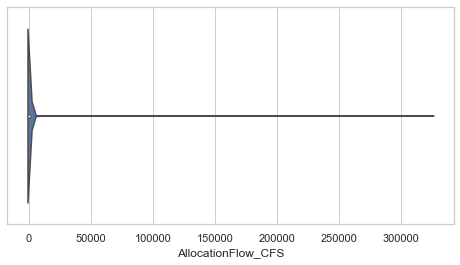

In [46]:
plt.figure(figsize = (8,4))
sns.violinplot(x=df_wa["AllocationFlow_CFS"])

<AxesSubplot:xlabel='AllocationFlow_CFS', ylabel='Count'>

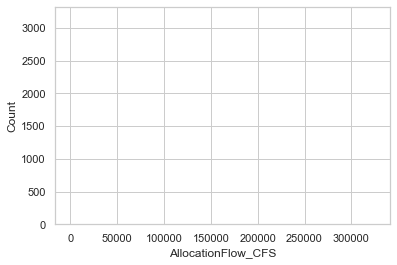

In [42]:
sns.histplot(data=df_wa, x="AllocationFlow_CFS")

In [45]:
df_wa['AllocationFlow_CFS'].describe()

count     11793.000000
mean        271.948473
std        3255.463889
min           0.000000
25%           1.020000
50%           3.130000
75%          20.830000
max      325000.000000
Name: AllocationFlow_CFS, dtype: float64

In [13]:
# waterallocations_missing.xlsx
if (os.path.exists('ProcessedInputData/waterallocations_missing.xlsx') == True):
    print("File exists.")
    print("Merging missing and input files based on WaDEUUID...")
    
    inputfile = "ProcessedInputData/waterallocations_missing.xlsx"
    df_wa_ms = pd.read_excel(inputfile)

    # Explode file by data assessment WaDEUUID
    df_wa_ms = df_wa_ms.assign(WaDEUUID=df_wa_ms['WaDEUUID'].str.split(',')).explode('WaDEUUID').reset_index(drop=True)

    # Create dataframes by input file
    df_wa_ms_gw = pd.merge(df_wa_ms, dfwyg, on='WaDEUUID', how='inner')
    df_wa_ms_sw = pd.merge(df_wa_ms, dfwys, on='WaDEUUID', how='inner')
    df_wa_ms_pou = pd.merge(df_wa_ms, dfpou, on='WaDEUUID', how='inner')

    # Create a Pandas Excel writer using 'xlsxwriter' as the engine.
    writer = pd.ExcelWriter('DataAssessment/waterallocations_Incomplete.xlsx.xlsx', engine='xlsxwriter')

    # Write each input dataframe to a different worksheet.
    print("Writing to xlsx file...")
    df_wa_ms_gw.to_excel(writer, sheet_name='GW')
    df_wa_ms_sw.to_excel(writer, sheet_name='SW')
    df_wa_ms_pou.to_excel(writer, sheet_name='POU')

    # Close the Pandas Excel writer and output the Excel file.
    writer.save()
    print("Done.")
    
else:
    print("No waterallocations_missing.xlsx file.")

File exists.
Merging missing and input files based on WaDEUUID...
Writing to xlsx file...
Done.


In [14]:
writer.close()

C:\Users\rjame\anaconda3\lib\site-packages\xlsxwriter\workbook.py:339: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")
